In [46]:
#@title Exercices 1, 2 et 3

# Classe dans la question
class Grenier:
    def __init__(self):
        self._les_boites = []

    def ajouter_boite(self, une_boite):
        self._les_boites.append(une_boite)

    def get_boites(self):
        return self._les_boites

    # Pour la question 3    
    def objet_present(self, description):
        for boite in self._les_boites:
            if self.objet_present_recursif(boite, description):    # Pourrait être une méthode de la classe boîte également
                return True
        return False
    
    def objet_present_recursif(self, une_boite, description):
        items = une_boite.get_items()
        for un_item in items:
            if type(un_item) is Boite and self.objet_present_recursif(un_item, description): 
                return True
            elif type(un_item) is Objet and un_item.get_description() == description:
                return True
        return False

# Classes à réaliser pour la réponse

class Boite:
    def __init__(self, largeur, hauteur, profondeur):
        self._items = []
        self._largeur = largeur
        self._hauteur = hauteur
        self._profondeur = profondeur

    # Réponse à la question 2
    def ajouter_item(self, item):    # L'item peut être soit un objet ou encore une boîte plus petite
        if item.get_volume() < self._volume_restant():
            self._items.append(item)
        else:
            raise RuntimeError        
    
    # Nécessaire à la question 3 si la méthode de recherche n'est pas ici.
    def get_items(self):
        return self._items

    def get_volume(self):
        return self._largeur * self._hauteur * self._profondeur

    # Nécessaire pour la question 2
    def _volume_restant(self):
        volume_total = self.get_volume()
        for item in self._items:
            volume_total -= item.get_volume()
        return volume_total

class Objet:
    def __init__(self, description, volume):
        self._description = description
        self._volume = volume

    def get_volume(self):
        return self._volume

    def get_description(self):
        return self._description

# Code exemple qui doit fonctionner
grenier = Grenier()
boite_bleue = Boite(40, 25, 25)
boite_rouge = Boite(5, 2, 1)
boite_bleue.ajouter_item(boite_rouge)
boite_rouge.ajouter_item(Objet("Medaillon", 5))
boite_bleue.ajouter_item(Objet("Album photo mariage", 750))
grenier.ajouter_boite(boite_bleue)

# Pour tester le lancement de l'exception
# boite_bleue.ajouter_item(Boite(40, 25, 25))


In [47]:
#@title Exercice 3

boite_verte = Boite(2, 2, 2)
boite_mauve = Boite(1, 2, 1)
boite_mauve.ajouter_item(Objet("Pendentif magique", 0.1))
boite_verte.ajouter_item(boite_mauve)
boite_bleue.ajouter_item(boite_verte)

if grenier.objet_present("Pendentif magique"):
    print("Le pendentif est dans le grenier")
else:
    print("Le pendentif n'est pas dans le grenier")

Le pendentif est dans le grenier


In [357]:
#@title Exercice 4

def taille_sequence(elements):
    longueur_sequence = 0
    i = 0
    while i < len(elements) - 1:
        j = i + 1
        while j < len(elements) and elements[j] == elements[i]:
            j += 1
        if j - i > longueur_sequence:
            longueur_sequence = j - i
        i = j
    return longueur_sequence

# print(taille_sequence([1, 2, 3, 4]))
# print(taille_sequence([1, 2, 2, 4]))
# print(taille_sequence([2, 2, 1, 4]))
# print(taille_sequence([2, 1, 4, 4]))
# print(taille_sequence([4, 4, 4, 4]))
# print(taille_sequence([1, 1, 1, 2, 3, 2, 2, 4, 4, 4, 4]))
# print(taille_sequence([1, 1, 1, 1, 1, 2, 3, 2, 2, 4, 4, 4, 4]))

# Complexité temporelle O(n). Bien qu'il y ait deux boucles imbriquées. Le i = j à la fin de la
# deuxième boucle fait que la première boucle ne reviendra pas sur les éléments ayant la même valeur

# Complexité spatiale O(1). Seulement trois variables, aucun lien avec n.


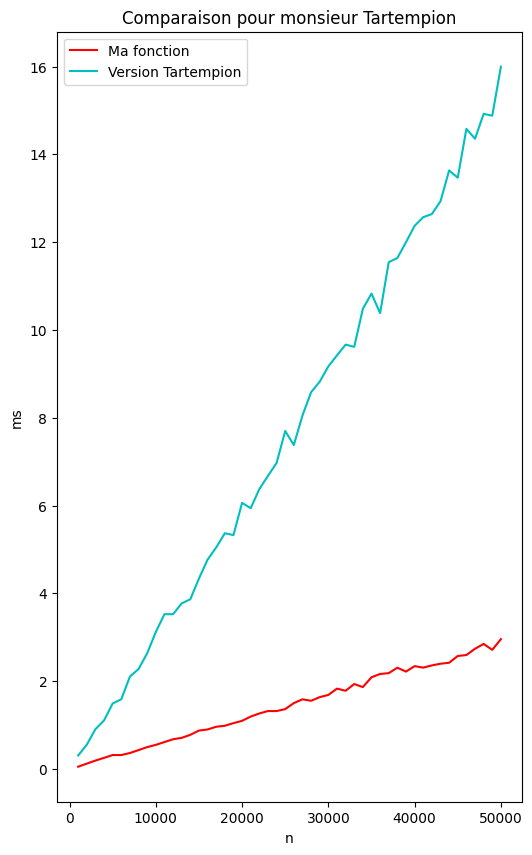

In [ ]:
#@title Exercice 5
import random
import matplotlib.pyplot as plt
import timeit

PROBABILITE_REPETITION = 0.80   
DONNEES_MAX = 50000               # Diminuez cette valeur si c'est trop long à exécuter            
PAS = 1000                     

# Fonction de monsieur Tartempion
# Il n'est pas nécessaire d'avoir cette fonction pour répondre à la question. Il suffit de présumer qu'elle
# existe et de l'appeler correctement.
def sequence_tartempion(elements):
    longueur_sequence = 0
    for i in range(len(elements)):
        j = i + 1
        while j < len(elements) and elements[j] == elements[i]:
            j += 1
        nouvelle_longueur = j - i
        if nouvelle_longueur > longueur_sequence:
            longueur_sequence = nouvelle_longueur
    return longueur_sequence
    
# print(taille_sequence([1, 2, 3, 4]))
# print(taille_sequence([1, 2, 2, 4]))
# print(taille_sequence([2, 2, 1, 4]))
# print(taille_sequence([2, 1, 4, 4]))
# print(taille_sequence([4, 4, 4, 4]))
# print(taille_sequence([1, 1, 1, 2, 3, 2, 2, 4, 4, 4, 4]))
# print(taille_sequence([1, 1, 1, 1, 1, 2, 3, 2, 2, 4, 4, 4, 4]))

# Ici, dans le pire des cas (même valeur partout), c'est O(n²). Le pire cas est très improbable mais il en
# demeure pas moins que l'algorithme est beaucoup plus lent.


# Méthode pour les données de tests
# n doit être > 0
def donnees_aleatoire(n):
    while True:
        donnees = [random.randint(1, 10)]
        for i in range(1, n):
            if random.uniform(0, 1) > PROBABILITE_REPETITION:
                donnees.append(random.randint(1, 10))
            else:
                donnees.append(donnees[-1])
        if taille_sequence(donnees) > 1:
            break    
    return donnees

# Prise des données avec les deux fonctions

x = []
y_taille_sequence = []
y_tartempion = []
for n in range(PAS, DONNEES_MAX + PAS, PAS):
    elements = donnees_aleatoire(n) 
    # elements = [1] * n        # Ceci est le pire cas pour la fonction de Tartempion. Illustre bien que c'est O(n²)
    x.append(n)

    temps_sequence = timeit.repeat(lambda: taille_sequence(elements), number=10, repeat=5)
#   temps_moyen_sequence = sum(temps_sequence) / len(temps_sequence) * 1000
#    y_taille_sequence.append(temps_moyen_sequence/10)
    y_taille_sequence.append(1000 * min(temps_sequence) / 10)  # Le graphique est plus intéressant avec le meilleur temps

    temps_tartempion  = timeit.repeat(lambda: sequence_tartempion(elements), number=10, repeat=5)
#   temps_moyen_tartempion = sum(temps_tartempion) / len(temps_tartempion) * 1000
#    y_tartempion.append(temps_moyen_tartempion/10)
    y_tartempion.append(1000 * min(temps_tartempion) / 10) # Le graphique est plus intéressant avec le meilleur temps

# Présentation des résultats

plt.figure(figsize=(6, 10))
plt.title("Comparaison pour monsieur Tartempion")
plt.xlabel("n")
plt.ylabel("ms")

plt.plot(x, y_taille_sequence, "-r", label="Ma fonction")
plt.plot(x, y_tartempion, "-c", label="Version Tartempion")
plt.legend()

plt.show()

In [ ]:
#@title Exercice 6

class Noeud:
    def __init__(self, valeur):
        self._valeur = valeur
        self._suivant = None

    def set_suivant(self, noeud):
        self._suivant = noeud

    def get_suivant(self):
        return self._suivant

    def get_valeur(self):
        return self._valeur


# code initial:
# noeud_1 = Noeud(34)
# noeud_3 = Noeud(55)
# noeud_2 = Noeud(21)
# noeud_4 = Noeud(71)

# noeud_1.set_suivant(noeud_3)
# noeud_3.set_suivant(noeud_4)
# noeud_2.set_suivant(noeud_2)

# code corrigé:
noeud_1 = Noeud(34)
noeud_3 = Noeud(71)
noeud_2 = Noeud(21)
noeud_4 = Noeud(55)

noeud_1.set_suivant(noeud_2)
noeud_2.set_suivant(noeud_3)
noeud_3.set_suivant(noeud_4)


In [ ]:
#@title Exercice 7

# version initiale du tri:
# def tri_selection(elements):
#     for i in range(len(elements) - 1):
#         plus_petit = i
#         for j in range(i+1, len(elements) - 1):
#             if elements[j] < elements[plus_petit]:
#                 plus_petit = j
#         if plus_petit != i:
#             elements[plus_petit] = elements[i]
#             elements[i] = elements[plus_petit]

# liste_test = [4, 1, 2, 5, 3, 2, 8]
# tri_selection(liste_test)
# print(liste_test)

# Version corrigée:
def tri_selection(elements):
    for i in range(len(elements) - 1):
        plus_petit = i
        for j in range(i+1, len(elements)): # Il faut considérer le dernier élément
            if elements[j] < elements[plus_petit]:
                plus_petit = j
        if plus_petit != i:
            elements[plus_petit], elements[i] = elements[i], elements[plus_petit] # Il faut échanger le valeurs. Pas écraser.

liste_test = [4, 1, 2, 5, 3, 2, 8]
tri_selection(liste_test)
print(liste_test)
